In [2]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import random as rd
import statistics as st

In [3]:
dataset = 'test.txt'

In [4]:
# def get_edge_list(file_name):
#     with open(file_name) as ifs:
#         lines = ifs.readlines()
#         edge_list = map(lambda line: map(int, line.strip().split()), filter(lambda ele: '#' not in ele, lines))
#     return edge_list

def get_edge_list(file_name):
    # Open the file and read its contents
    with open(file_name) as file:
        lines = file.readlines()

    # Remove lines that are comments (start with "#")
    lines = [line for line in lines if '#' not in line]

    # Convert each line to a pair of integers
    edge_list = []
    for line in lines:
        edge = tuple(map(int, line.strip().split()))
        edge_list.append(edge)
    
    return edge_list

def get_undirected_graph_info(file_name):
    my_edge_list = get_edge_list(file_name)
    undirected_graph = nx.Graph()
    undirected_graph.add_edges_from(my_edge_list)
    file_info = file_name.split(os.sep)[-1].split('_')[0]
    str_list = [file_info, 'nodes num:' + str(undirected_graph.number_of_nodes()), 'edges num:'
                + str(undirected_graph.number_of_edges())]
    print (' | '.join(str_list))


def get_dir_info(dir_name):
    my_walk = os.walk(dir_name)
    my_root, sub_root_list, file_list = list(my_walk)[0]
    path_list = map(lambda ele: my_root + os.sep + ele, file_list)
    for my_path in path_list:
        get_undirected_graph_info(my_path)


In [5]:
get_undirected_graph_info(dataset)

test.txt | nodes num:9 | edges num:14


In [6]:
edgeList = get_edge_list(dataset)

In [7]:
print(edgeList)

[(1, 2), (1, 3), (1, 5), (2, 1), (2, 4), (2, 3), (3, 2), (3, 4), (3, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 1), (5, 4), (6, 4), (6, 7), (6, 8), (6, 9), (7, 4), (7, 6), (7, 8), (8, 7), (8, 6), (8, 9)]


In [8]:
undirected_graph = nx.Graph()
undirected_graph.add_edges_from(edgeList)

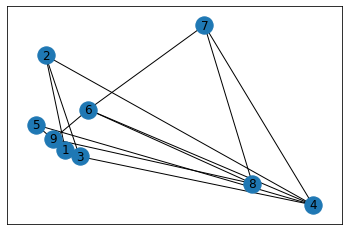

In [9]:

nx.draw_networkx(undirected_graph,pos=nx.random_layout(undirected_graph))

In [10]:
rd.choice (list(undirected_graph.edges(1)))
undirected_graph.edges((1,2))


EdgeDataView([(1, 2), (1, 3), (1, 5), (2, 4), (2, 3)])

In [11]:
graphEdge = undirected_graph.edges()
graphNode = undirected_graph.nodes()

In [12]:
number_of_edges = len(graphEdge)
number_of_nodes = len(graphNode)

In [13]:
initialGene= np.full(number_of_edges, -1)

In [14]:
locus = [i for i in range(1,number_of_edges+1)]
locus

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [15]:
len(initialGene)

14

In [16]:
labledEdge = {t: i+1 for i, t in enumerate(graphEdge)}
labledEdge

{(1, 2): 1,
 (1, 3): 2,
 (1, 5): 3,
 (2, 4): 4,
 (2, 3): 5,
 (3, 4): 6,
 (5, 4): 7,
 (4, 6): 8,
 (4, 7): 9,
 (6, 7): 10,
 (6, 8): 11,
 (6, 9): 12,
 (7, 8): 13,
 (8, 9): 14}

In [17]:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 
[2, 1, 7, 5, 4, 8, 6, 9, 13, 8, 10, 11, 9, 12]

[2, 1, 7, 5, 4, 8, 6, 9, 13, 8, 10, 11, 9, 12]

In [18]:
def getEdgeLabel(labledEdge,edge):
    try:
      return labledEdge[edge]
    except:
      try:
        return labledEdge[(edge[1],edge[0])]
      except:
        print('NO KEY FOUND')
    

In [19]:
def getEdgeValue(labledEdge,value):
   return next((k for k, v in labledEdge.items() if v == value), None)

getEdgeValue(labledEdge,5)

(2, 3)

In [20]:
#make initial communities

gene = []
for  edge,l in labledEdge.items():
    connectedEdges = list(undirected_graph.edges(edge))
    geneValue = getEdgeLabel(labledEdge,rd.choice(connectedEdges))


    if(geneValue != None):
        gene.append(geneValue)

print(locus)
print(gene)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[3, 2, 1, 1, 1, 7, 8, 7, 9, 12, 12, 8, 14, 12]


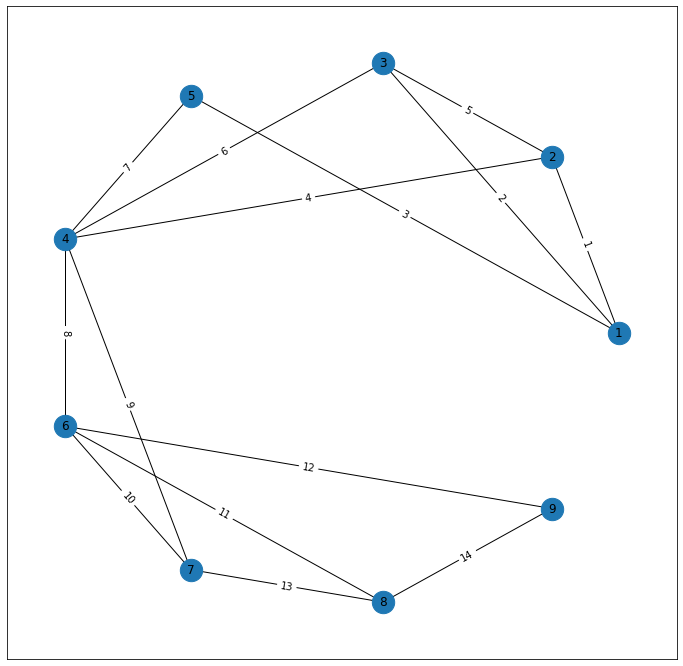

In [21]:
def drawLayout(labledEdge):
    # layout = nx.random_layout(undirected_graph)
    layout = nx.circular_layout(undirected_graph)
    plt.figure(3,figsize=(12,12)) 
    nx.draw_networkx(undirected_graph,pos=layout,node_size=500)
    nx.draw_networkx_edge_labels(undirected_graph,pos=layout,edge_labels=labledEdge)
drawLayout(labledEdge)

{(1, 2): Text(0.40412066876888275, 0.558060385286808, '1'),
 (1, 3): Text(0.40595708787441254, 0.5218181386590004, '2'),
 (1, 5): Text(0.5646061450242996, 0.23885729163885117, '3'),
 (2, 4): Text(0.6251144707202911, 0.6810791343450546, '4'),
 (2, 3): Text(0.6294899582862854, 0.902064323425293, '5'),
 (3, 4): Text(0.6269508898258209, 0.644836887717247, '6'),
 (5, 4): Text(0.785599946975708, 0.3618760406970978, '7'),
 (4, 6): Text(0.5195783078670502, 0.5025656968355179, '8'),
 (4, 7): Text(0.45508821308612823, 0.5945232659578323, '9'),
 (6, 7): Text(0.35209111869335175, 0.6732372641563416, '10'),
 (6, 8): Text(0.4972786605358124, 0.42107853293418884, '11'),
 (6, 9): Text(0.7063168287277222, 0.7435374557971954, '12'),
 (7, 8): Text(0.43278856575489044, 0.5130361020565033, '13'),
 (8, 9): Text(0.7870142757892609, 0.5833362936973572, '14')}

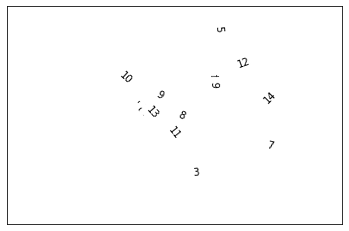

In [22]:
nx.draw_networkx_edge_labels(undirected_graph,pos=nx.random_layout(undirected_graph),edge_labels=labledEdge)

In [23]:

print(locus)
print(gene)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[3, 2, 1, 1, 1, 7, 8, 7, 9, 12, 12, 8, 14, 12]


In [24]:
#finished but not tested with real gene
def calculateFitness(communities: list,labledEdge):
    D = 0
    E = len(labledEdge)
    for i in communities:
        community = nx.Graph()
        community.add_edges_from([getEdgeValue(labledEdge, j) for j in i])
        mc = community.number_of_edges()
        nc = community.number_of_nodes()
        # print(nc)
        if nc>=3:
            D += mc * ((mc - (nc-1)) / (((nc-2)*(nc-1))))
            # print(D)

    return 2*D/E

calculateFitness([[1,2,7],[7,8,9]],labledEdge)

-0.03571428571428571

In [25]:
print(type({1,2}))


<class 'set'>


In [26]:
def makeCommunities(locus,gene):
    communityList=[]
    edge1 = locus[0]
    edge2 = gene[0]
    for i in range(1,len(locus)):
        pass

        
        
    

In [27]:
def most_frequent(List):
    return max(set(List), key = List.count)

most_frequent([1,1,2,2,3,3,3])

# def most_common(List):
#     return(st.mode(List))
   
# List = [2, 1, 2, 2, 1, 3]
# print(most_common(List))

3

In [28]:
def getNodeLabel():
    pass

In [29]:
def setNodeLabel():
    pass

In [30]:
def has_repetitions(lst):
    return len(set(lst)) < len(lst)

has_repetitions([1,1,2,2])



True

In [31]:
from collections import defaultdict



def createCommunities(x:dict):
    groups = defaultdict(list)

    # Group the keys based on the values
    for key, value in x.items():
        groups[value].append(key)

    # Get the list of lists with the keys
    y = list(groups.values())

    return y

x = {1: 2, 2: 2, 3: 2, 4: 8, 5: 1, 6: 8, 7: 8, 8: 8, 9: 8}
createCommunities(x)

[[1, 2, 3], [4, 6, 7, 8, 9], [5]]

In [32]:
#Label Propagation

def labelProp(undirected_graph):
    
    graphNode = undirected_graph.nodes()
    asList = sorted(list(graphNode))
    randomizedList = asList[:]
    rd.shuffle(randomizedList)
    # print(randomizedList)
    labledNodes = {i+1:t  for i, t in enumerate(asList)}
    prevLabledNodes = labledNodes
    # print(labledNodes)
    stop = False
    while not stop:
        for v in randomizedList:
            # v = rd.choice(asList)
            # v = 5
            neighbors = [i for i in nx.all_neighbors(undirected_graph,v)]
            labledNeighbors = [labledNodes[i] for i in nx.all_neighbors(undirected_graph,v)]
            # print(neighbors)
            
            if(has_repetitions(labledNeighbors)):
                freq = most_frequent(labledNeighbors)
                labledNodes[v] = freq
            else:
                freq = rd.choice(labledNeighbors)
                labledNodes[v] = freq
            
            # print(labledNodes)

            if(prevLabledNodes == labledNodes):
                stop = True
    return labledNodes

labelProp(undirected_graph)

{1: 2, 2: 2, 3: 2, 4: 7, 5: 7, 6: 7, 7: 7, 8: 7, 9: 7}

In [33]:
# Local Expansion

def localExpansion(undirected_graph):
    counter = 0
    communities = []
    graphNode = undirected_graph.nodes()
    asList = list(graphNode)
    V = len(asList)
    tempList = asList[:]
    while counter < V:
        community = []
        seed = rd.choice(tempList)
        community.append(seed)
        tempList.remove(seed)
        counter+=1
        naturalCommNodes = list(nx.all_neighbors(undirected_graph,seed))
        for i in naturalCommNodes:
            # naturalCommNodes.remove(seed)
            if i not in tempList:
                continue
            community.append(i)
            try:
                tempList.remove(i)
            except ValueError:
                print('E')
            counter+=1
        communities.append(community)
    return communities
        
localExpansion(undirected_graph)

[[9, 6, 8], [5, 1, 4], [2, 3], [7]]

In [34]:
centrality = nx.eigenvector_centrality(undirected_graph)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
sorted_centrality

[(4, 0.4933920733573079),
 (6, 0.40706047630591524),
 (7, 0.3584871224114072),
 (2, 0.324913401601575),
 (3, 0.324913401601575),
 (8, 0.29309722985908043),
 (1, 0.26345729483676417),
 (5, 0.22732374123127333),
 (9, 0.2102944623170073)]

In [35]:
# Local Expansion

def localExpansionWithEigen(undirected_graph):
    counter = 0
    communities = []
    graphNode = undirected_graph.nodes()
    asList = list(graphNode)
    V = len(asList)
    tempList = asList[:]

    centrality = nx.eigenvector_centrality(undirected_graph)
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

    
    while counter < V :
        community = []
        seed = sorted_centrality[0][0]
        sorted_centrality.pop(0)
        if seed not in tempList:
            continue
        community.append(seed)
        tempList.remove(seed)
        counter+=1
        naturalCommNodes = list(nx.all_neighbors(undirected_graph,seed))
        for i in naturalCommNodes:
            # naturalCommNodes.remove(seed)
            if i not in tempList:
                continue
            community.append(i)
            tempList.remove(i)
            counter+=1
        communities.append(community)
    return communities
        
localExpansionWithEigen(undirected_graph)

[[4, 2, 3, 5, 6, 7], [8, 9], [1]]

In [36]:

for i in range(7):
    le = localExpansion(undirected_graph)
    fit = calculateFitness(le,labledEdge)
    print(f'fitness : {fit} | CommunityList : {le}')
    
    

fitness : 0.0 | CommunityList : [[9, 6, 8], [5, 1, 4], [2, 3], [7]]
fitness : 0.14285714285714285 | CommunityList : [[4, 2, 3, 5, 6, 7], [8, 9], [1]]
fitness : 0.09523809523809523 | CommunityList : [[1, 2, 3, 5], [7, 4, 6, 8], [9]]
fitness : 0.0 | CommunityList : [[8, 6, 7, 9], [3, 1, 2, 4], [5]]
fitness : 0.0 | CommunityList : [[7, 4, 6, 8], [5, 1], [2, 3], [9]]
fitness : 0.0 | CommunityList : [[9, 6, 8], [7, 4], [5, 1], [2, 3]]
fitness : 0.0 | CommunityList : [[2, 1, 4, 3], [8, 6, 7, 9], [5]]


In [37]:
for i in range(7):
    lp = labelProp(undirected_graph)
    cmnti = createCommunities(lp)
    # print(cmnti)
    fit = calculateFitness(cmnti,labledEdge)
    print(f'fitness : {fit} | CommunityList : {cmnti}')



fitness : 0.05952380952380952 | CommunityList : [[1, 2, 3, 4, 5], [6, 8, 9], [7]]
fitness : 0.0 | CommunityList : [[1], [2, 3, 4, 5], [6, 7, 8, 9]]
fitness : 0.05952380952380952 | CommunityList : [[1, 2, 3, 4, 5], [6, 9], [7], [8]]
fitness : 0.09523809523809523 | CommunityList : [[1, 2, 3, 5], [4, 6, 7, 8], [9]]
fitness : 0.042857142857142864 | CommunityList : [[1, 2, 3], [4, 5, 6, 7, 8, 9]]
fitness : 0.05952380952380952 | CommunityList : [[1, 2, 3, 4, 5], [6, 7, 8, 9]]
fitness : 0.05952380952380952 | CommunityList : [[1, 2, 3, 4, 5], [6, 8, 9], [7]]


In [38]:
for i in range(7):
    le = localExpansionWithEigen(undirected_graph)
    fit = calculateFitness(le,labledEdge)
    print(f'fitness : {fit} | CommunityList : {le}')

fitness : 0.14285714285714285 | CommunityList : [[4, 2, 3, 5, 6, 7], [8, 9], [1]]
fitness : 0.14285714285714285 | CommunityList : [[4, 2, 3, 5, 6, 7], [8, 9], [1]]
fitness : 0.14285714285714285 | CommunityList : [[4, 2, 3, 5, 6, 7], [8, 9], [1]]
fitness : 0.14285714285714285 | CommunityList : [[4, 2, 3, 5, 6, 7], [8, 9], [1]]
fitness : 0.14285714285714285 | CommunityList : [[4, 2, 3, 5, 6, 7], [8, 9], [1]]
fitness : 0.14285714285714285 | CommunityList : [[4, 2, 3, 5, 6, 7], [8, 9], [1]]
fitness : 0.14285714285714285 | CommunityList : [[4, 2, 3, 5, 6, 7], [8, 9], [1]]


In [39]:
# undirected_graph.edges([8,9])

In [40]:
g = [-1]*5

g[4] = 'a'
g

[-1, -1, -1, -1, 'a']

In [41]:
def has_common_element(list1, list2):
    for element in list1:
        if element in list2:
            return True
    return False

In [42]:
# this takes a list of community and returns a list of locus and gene
def communityToGene(communities:list,number_of_nodes:int,number_of_edges:int,labledEdge:dict):
    locus = [i for i in range(1,number_of_edges+1)]
    gene = [-1] * number_of_edges
    # overlappingEdges = []
    for community in communities:
        edgesAsTuples = list(undirected_graph.edges(community))
        edges=[getEdgeLabel(labledEdge,i) for i in edgesAsTuples]
        # print(edgesAsTuples)
        for n,i in enumerate(edgesAsTuples):
            edgeLabel = getEdgeLabel(labledEdge,i)
            ngEdges = list(undirected_graph.edges(i))
            ngEdges.remove(i)
            ngEdgesLabeled=[getEdgeLabel(labledEdge,t) for t in ngEdges]
            # print(ngEdgesLabeled)
            for element in ngEdgesLabeled:
                if element in edges:
                    if(gene[edgeLabel-1]!=-1 or gene[element-1]== edgeLabel):
                        continue
                    gene[edgeLabel-1] = element
                    edges.remove(element)
                    break
    return locus,gene


locus,gene = [],[]
locus,gene = communityToGene([[1,2,3,4,5], [6,7,8, 9]],number_of_nodes,number_of_edges,labledEdge)
print((locus))
print((gene))

locus,gene = communityToGene(localExpansionWithEigen(undirected_graph),number_of_nodes,number_of_edges,labledEdge)
print((gene)) 
    


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[2, 3, 1, 5, 6, 4, 8, 9, 7, 8, 10, 11, 9, 13]
[5, 1, 1, 6, 2, 7, 4, 9, 10, 8, 12, 14, 11, 11]


In [43]:
def locusNgeneToTuples(locus:list,gene:list):
    pass

In [44]:
def crossOver(parent1:list, parent2:list, cp:float):
    offspring = [-1]*len(parent1) 
    for g in range(len(offspring)):
        if rd.uniform(0, 1) < cp:
            offspring[g] = parent1[g]
        else:
            offspring[g] = parent2[g]
    return offspring

testParent1 = [2, 3, 1, 5, 6, 4, 8, 9, 7, 8, 10, 11, 9, 13]
testParent2 = [5, 1, 1, 6, 2, 7, 4, 9, 10, 8, 12, 14, 11, 11]
crossOver(testParent1,testParent2, 0.5)
    

[5, 3, 1, 6, 6, 7, 4, 9, 7, 8, 12, 14, 9, 11]

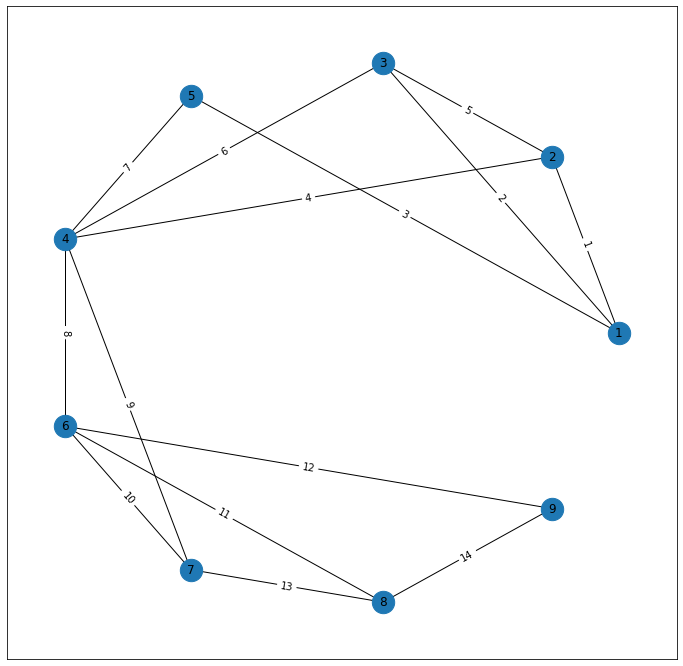

In [45]:
drawLayout(labledEdge)

In [93]:
def mutate(gene:list,mp:float,labledEdge:dict,undirected_graph)->list:
    individual = gene[:] 
    for g in range(len(individual)):
        if rd.uniform(0, 1) < mp:
            edge = getEdgeValue(labledEdge,individual[g])
            # print(edge)
            neigEdges = list(undirected_graph.edges(edge))
            neigEdges.remove(edge)
            randomEdge = rd.choice(neigEdges)
            # print(randomEdge)
            mutatedEdge = getEdgeLabel(labledEdge,randomEdge)
            individual[g]= mutatedEdge

    return individual


print("Before Mutation ⬇")
print([5, 3, 1, 6, 6, 7, 4, 9, 7, 8, 12, 14, 9, 11])
mutated = mutate([5, 3, 1, 6, 6, 7, 4, 9, 7, 8, 12, 14, 9, 11],0.5,labledEdge,undirected_graph)
print(mutated)
print("After Mutation ⬆")

Before Mutation ⬇
[5, 3, 1, 6, 6, 7, 4, 9, 7, 8, 12, 14, 9, 11]
[5, 3, 1, 6, 6, 8, 4, 9, 8, 10, 14, 13, 9, 11]
After Mutation ⬆


In [84]:
rd.uniform(0, 1)

0.18002705178581502

In [47]:
type(undirected_graph)

networkx.classes.graph.Graph

In [90]:
x = ['a','b','c']
for i in x:
    if i == 'b':
        i='x'
x

['a', 'b', 'c']